In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


### Load the Data

In [2]:
os.chdir('/kaggle/input/iris/')

In [3]:
!ls

Iris.csv  database.sqlite


In [4]:
data  = pd.read_csv('Iris.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data_copy = data.copy()

In [9]:
data_copy.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning


### Check for Missing Data

In [10]:
print(data_copy.isnull().sum().sort_values(ascending=False))

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
# or
data_copy.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Remove unuesd column

In [12]:
data_copy.drop('Id', axis=1,inplace= True)

In [13]:
data_copy.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data visualization

<AxesSubplot:>

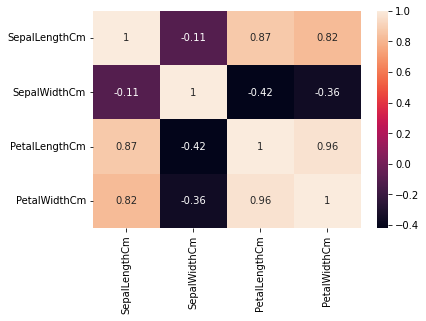

In [14]:
sns.heatmap(data_copy.corr(),annot=True)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

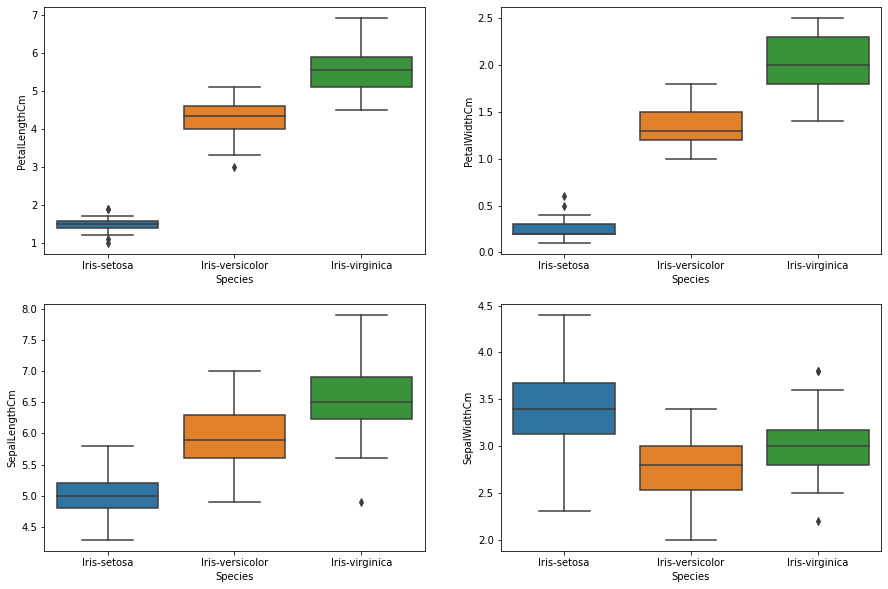

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=data_copy)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=data_copy)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=data_copy)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=data_copy)

In [16]:
count_list = [(data_copy.Species == 'Iris-setosa').sum(), (data_copy.Species == 'Iris-versicolor').sum(), (data_copy.Species == 'Iris-virginica').sum()]
count_list

[50, 50, 50]

In [17]:
label_list= list(data_copy['Species'].unique())
label_list

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [18]:
print(f'{label_list[0]}: {count_list[0]}')
print(f'{label_list[1]}: {count_list[1]}')
print(f'{label_list[2]}: {count_list[2]}')

Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50


<AxesSubplot:xlabel='Species', ylabel='count'>

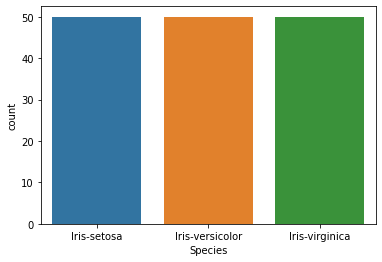

In [19]:
sns.countplot(x='Species',data=data_copy)

### Convert categorical data

In [20]:
Species=pd.get_dummies(data_copy["Species"])
Species

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


### Merging dummies with dataframe 

In [21]:
data_copy = pd.concat([data_copy.drop("Species", axis = 1),Species], axis =1)

In [22]:
data_copy

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


###  Splitting Data

In [23]:
X = data_copy[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = data_copy[['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']].values
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (150, 4) 
 y_shape: (150, 3)


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.30, random_state=101,shuffle=True)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (105, 4) & X_test: (45, 4)
 y_train: (105, 3) & y_test: (45, 3)


### Scaling the Data

In [25]:
# Normalization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

0.0
1.0


## Select the Model


### Build a Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=1,random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred_en = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

In [27]:
from sklearn.metrics import accuracy_score ,confusion_matrix
y_pred_en = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)
print('Accuracy score of Test: ', accuracy_score(y_test, y_pred_en)*100)
print('Accuracy score of Train: ', accuracy_score(y_train, y_pred_train)*100)

Accuracy score of Test:  55.55555555555556
Accuracy score of Train:  71.42857142857143


### Evaluate the Model

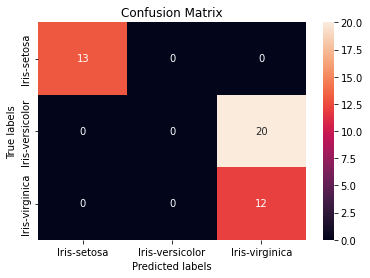

In [28]:
    
lables = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred_en).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(lables); ax.yaxis.set_ticklabels(lables);

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        20
           2       0.38      1.00      0.55        12

   micro avg       0.56      0.56      0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45
 samples avg       0.56      0.56      0.56        45



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Cross Validation
#### 1. To Get the Best Hyper Parameters
#### 2. For Validating the Model

##### Grid Search CV :Getting Best Hyper Parameters

In [30]:
clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [31]:
from sklearn.model_selection import GridSearchCV
parameters= {'criterion':['gini', 'entropy'],
             'max_depth':[3,5,7],'splitter':['best', 'random'],
            'random_state': [0,42]}


grid_search = GridSearchCV(estimator = clf,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = -1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 


grid_search = grid_search.fit(X_train_scaled, y_train)

print("best accuracy is :" , grid_search.best_score_ * 100)

grid_search.best_params_ 

best accuracy is : 97.0909090909091


{'criterion': 'gini', 'max_depth': 5, 'random_state': 42, 'splitter': 'random'}

In [32]:
clf = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3,random_state=42)
clf.fit(X_train_scaled, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = clf, X = X_train_scaled, y = y_train, cv = 10)
print("Validation score: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

y_pred = clf.predict(X_test_scaled)
dt_acc = accuracy_score(y_test, y_pred)*100
print('Accuracy score: ', )

Validation score: 94.18182% (4.76211%)
Accuracy score: 


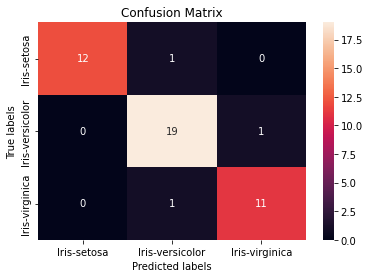

In [33]:
    
lables = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(lables); ax.yaxis.set_ticklabels(lables);

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.90      0.95      0.93        20
           2       0.92      0.92      0.92        12

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45



### Build a K-Neighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()

In [36]:
kn_clf.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [37]:
parameters= {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_neighbors':[3,5,7],'weights':['uniform', 'distance'],'p':[2,3,5,6,7]}


grid_search = GridSearchCV(estimator = kn_clf,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = -1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 


grid_search = grid_search.fit(X_train_scaled, y_train)

print("best accuracy is :" , grid_search.best_score_ * 100)

grid_search.best_params_ 

best accuracy is : 97.0909090909091


{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

In [38]:
kn_clf = KNeighborsClassifier(algorithm='auto',n_neighbors=5,p=2,weights='uniform')
kn_clf.fit(X_train_scaled, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = kn_clf, X = X_train_scaled, y = y_train, cv = 10)
print("Validation score: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

y_pred = kn_clf.predict(X_test_scaled)
kn_acc = accuracy_score(y_test, y_pred)*100
print('Accuracy score: ', kn_acc)

Validation score: 97.09091% (4.44990%)
Accuracy score:  97.77777777777777


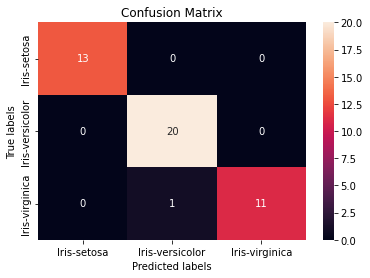

In [39]:
    
lables = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(lables); ax.yaxis.set_ticklabels(lables);

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.98        20
           2       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45
 samples avg       0.98      0.98      0.98        45



### Bilid a SVM

In [41]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# spliting Data
X_ = data.drop(columns="Species")
y_ = (data["Species"])

# Convert traget Label
le = LabelEncoder()
y_ = le.fit_transform(y_)


X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.20, random_state = 0)

# Scaling
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train_)
X_test_sc = sc.transform(X_test_)


svm_clf = SVC()
print(svm_clf.get_params().keys())


dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [42]:
#Grid-Search-CV 
parameters= {'C':[1,0.3,0.001,3,10],
             'kernel':['linear', 'rbf','poly'],
             'degree':[2,3,5,7],
             'gamma':['scale', 'auto']}


grid_search = GridSearchCV(estimator = svm_clf,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = -1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 


grid_search = grid_search.fit(X_train_sc, y_train_)

print("best accuracy is :" , grid_search.best_score_ * 100)

print(grid_search.best_params_)


best accuracy is : 100.0
{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [43]:
svm_clf = SVC(gamma='scale' ,C=1,kernel='rbf')
svm_clf.fit(X_train_sc, y_train_)
y_pred_ = svm_clf.predict(X_test_sc)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = svm_clf, X = X_train_sc, y = y_train_, cv = 10)
print("Validation score: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

y_pred_ = svm_clf.predict(X_test_sc)
svm_acc = accuracy_score(y_test_, y_pred_)*100
print('Accuracy score: ', svm_acc)

Validation score: 100.00000% (0.00000%)
Accuracy score:  100.0


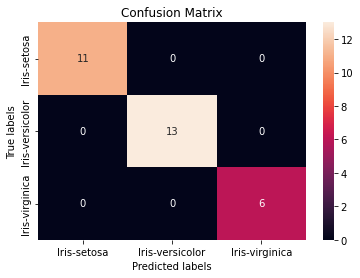

In [44]:
    
lables = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ax= plt.subplot()

cm = confusion_matrix(y_test_,y_pred_)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(lables); ax.yaxis.set_ticklabels(lables);

In [45]:
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [46]:
acc = [dt_acc,kn_acc,svm_acc]
labels = ['Decision Tree Classifier', 'K-Neighbors Classifier', 'SVM Classifier']
accs = {'Accuracy': acc}
df = pd.DataFrame(accs,index=labels)
df

,Accuracy
Decision Tree Classifier,93.333333
K-Neighbors Classifier,97.777778
SVM Classifier,100.000000
